In [1]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [2]:
model = Sequential()

In [3]:
def load_images_from_folder(folder):
    images = []
    labels = []
    
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        
        if os.path.isdir(subfolder_path):
            label = subfolder
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                
                if img is not None:
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels)

In [4]:
folder_path = 'data/train'

images, labels = load_images_from_folder(folder_path)

images = images / 255.0

In [5]:
folder_path = 'data/test'

images_test, labels_test = load_images_from_folder(folder_path)

images_test = images_test / 255.0

In [6]:
l=[]
for i in range(len(images)):
    l.append(resize(images[i], (28, 28, 3), anti_aliasing=True))
resized_images=np.array(l)
resized_images

array([[[[0.17677607, 0.17677607, 0.17677607],
         [0.06894349, 0.06894349, 0.06894349],
         [0.04775624, 0.04775624, 0.04775624],
         ...,
         [0.2880594 , 0.2880594 , 0.2880594 ],
         [0.51633814, 0.51633814, 0.51633814],
         [0.43511535, 0.43511535, 0.43511535]],

        [[0.19148049, 0.19148049, 0.19148049],
         [0.093448  , 0.093448  , 0.093448  ],
         [0.060951  , 0.060951  , 0.060951  ],
         ...,
         [0.26469167, 0.26469167, 0.26469167],
         [0.53969509, 0.53969509, 0.53969509],
         [0.43787645, 0.43787645, 0.43787645]],

        [[0.17572074, 0.17572074, 0.17572074],
         [0.12566057, 0.12566057, 0.12566057],
         [0.09614088, 0.09614088, 0.09614088],
         ...,
         [0.27717786, 0.27717786, 0.27717786],
         [0.53193549, 0.53193549, 0.53193549],
         [0.45666415, 0.45666415, 0.45666415]],

        ...,

        [[0.41071665, 0.41071665, 0.41071665],
         [0.38482125, 0.38482125, 0.38482125]

In [7]:
l=[]
for i in range(len(images_test)):
    l.append(resize(images_test[i], (28, 28, 3), anti_aliasing=True))
resized_images_test=np.array(l)
resized_images_test

array([[[[0.1629063 , 0.1629063 , 0.1629063 ],
         [0.09327122, 0.09327122, 0.09327122],
         [0.05253029, 0.05253029, 0.05253029],
         ...,
         [0.06895605, 0.06895605, 0.06895605],
         [0.04163005, 0.04163005, 0.04163005],
         [0.07058817, 0.07058817, 0.07058817]],

        [[0.15870649, 0.15870649, 0.15870649],
         [0.05813449, 0.05813449, 0.05813449],
         [0.05289667, 0.05289667, 0.05289667],
         ...,
         [0.10615442, 0.10615442, 0.10615442],
         [0.08497939, 0.08497939, 0.08497939],
         [0.08937549, 0.08937549, 0.08937549]],

        [[0.13443426, 0.13443426, 0.13443426],
         [0.10510207, 0.10510207, 0.10510207],
         [0.07031588, 0.07031588, 0.07031588],
         ...,
         [0.18490133, 0.18490133, 0.18490133],
         [0.10702314, 0.10702314, 0.10702314],
         [0.09391685, 0.09391685, 0.09391685]],

        ...,

        [[0.75966973, 0.75966973, 0.75966973],
         [0.62500869, 0.62500869, 0.62500869]

In [8]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(labels)
y_test  = label_encoder.fit_transform(labels_test)

X_train = resized_images.reshape(len(images), -1)
X_test  = resized_images_test.reshape(len(images_test), -1) 

y_train_cat = to_categorical(y_train, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

In [9]:
#model
model = Sequential()
model.add(Dense(2048, activation='relu', input_shape=(28 * 28 * 3,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train
model.fit(X_train, y_train_cat, epochs=100, validation_data=(X_test, y_test_cat))



Epoch 1/100


898/898 [==============================] - 59s 62ms/step - loss: 1.8040 - accuracy: 0.2596 - val_loss: 1.7996 - val_accuracy: 0.2579
Epoch 2/100
898/898 [==============================] - 62s 69ms/step - loss: 1.7347 - accuracy: 0.3062 - val_loss: 1.6956 - val_accuracy: 0.3345
Epoch 3/100
898/898 [==============================] - 57s 63ms/step - loss: 1.7017 - accuracy: 0.3214 - val_loss: 1.6932 - val_accuracy: 0.3318
Epoch 4/100
898/898 [==============================] - 61s 68ms/step - loss: 1.6876 - accuracy: 0.3274 - val_loss: 1.6621 - val_accuracy: 0.3430
Epoch 5/100
898/898 [==============================] - 44s 49ms/step - loss: 1.6730 - accuracy: 0.3327 - val_loss: 1.6638 - val_accuracy: 0.3331
Epoch 6/100
898/898 [==============================] - 44s 49ms/step - loss: 1.6649 - accuracy: 0.3357 - val_loss: 1.6522 - val_accuracy: 0.3462
Epoch 7/100
898/898 [==============================] - 44s 50ms/step - loss: 1.6566 - accuracy: 0.3390 - val_loss: 1.6410 - val

In [ ]:
model_json = model.to_json()
with open("ann_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('ann_model.h5')

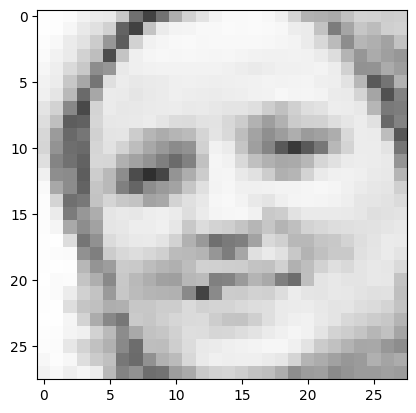

In [ ]:
plt.imshow(resize(images[10000], (28, 28, 3), anti_aliasing=True), cmap=plt.cm.binary)
plt.show()

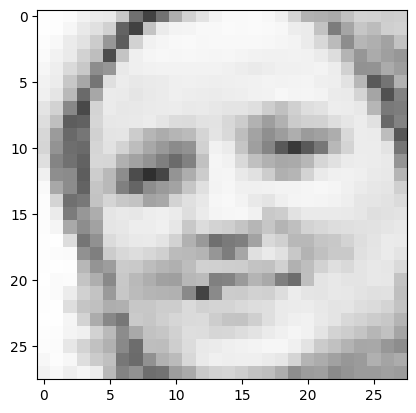

In [ ]:
plt.imshow(resized_images[10000], cmap=plt.cm.binary)
plt.show()

In [ ]:
model.save('ANN_Model.h5')